In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('nursery.data.csv')
# print(data.columns)
label_encoder = preprocessing.LabelEncoder()
data=data.set_axis(['parents','has_nurs','form','children','housing','finance','social','health','class_value'],axis=1)

data_encoded=data.copy()
data_encoded=shuffle(data_encoded, random_state=0)

X=data_encoded.drop(['class_value'],axis=1)
y=data_encoded['class_value']

subset =[]
for i in range(20,100,5):
   i/=100
   X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=i,test_size=1-i,random_state=0)
   subset.append([X_train,y_train,X_test,y_test])


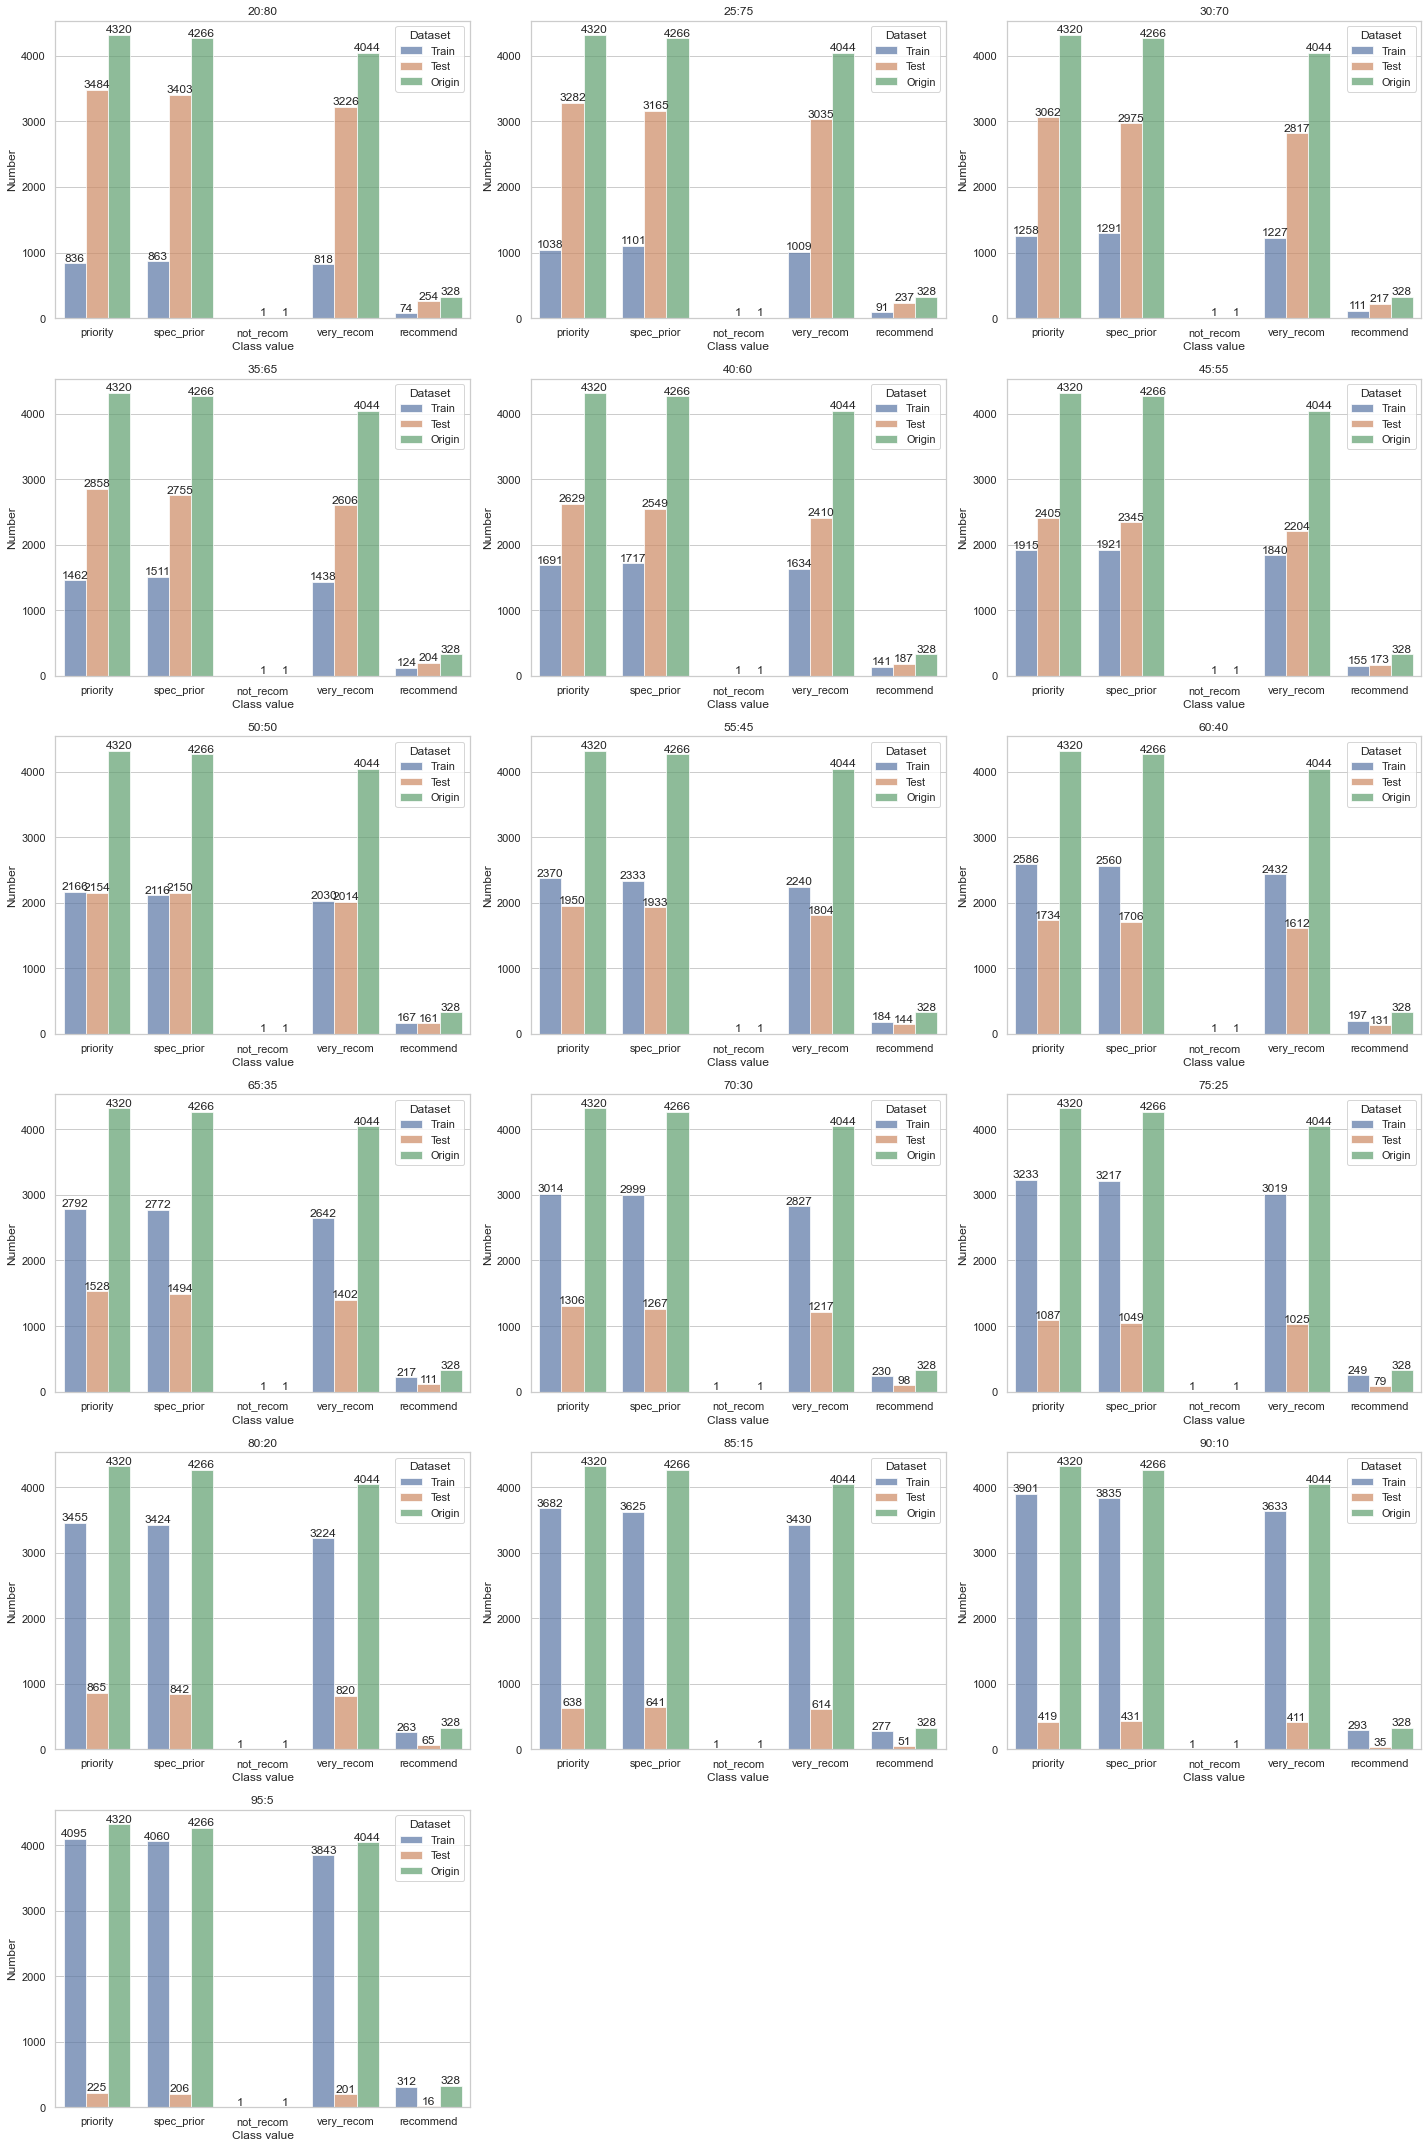

In [7]:
import seaborn as sns
plt.figure(figsize=(20,30))
sns.set(style="whitegrid")

Origin=y.value_counts()
categories=y.unique()
for i in range(len(subset)):
    plt.subplot(6, 3, i+1) 
    
    df = pd.DataFrame({'Category': categories, 'Train': subset[i][1].value_counts(), 'Test': subset[i][3].value_counts(),'Origin': Origin})

    df_plot = pd.melt(df, id_vars='Category', var_name='Dataset', value_name='Value')
    ax=sns.barplot(x="Category", y="Value", hue="Dataset", data=df_plot, alpha=0.7)
    
    # Annotate bars with count values
    for p in ax.patches:
        number=int(np.nan_to_num(p.get_height(), nan=0.0))
        
        ax.annotate(f'{number}', 
        #position of the number
        (p.get_x() + p.get_width()/2, p.get_height()), 
        ha='center', va='center', xytext=(0, 5), 
        textcoords='offset points')
    
    plt.xlabel('Class value')
    plt.ylabel('Number')
    plt.title(f"{20+i*5}:{100-20-i*5}")

categories=y.unique()

plt.tight_layout()
plt.show()

In [6]:
import graphviz
for i in range(len(subset)):
   for column in subset[i][0].columns:
      subset[i][0][column]=label_encoder.fit_transform(subset[i][0][column])
   clf = DecisionTreeClassifier(random_state=1234)
   model = clf.fit(subset[i][0], subset[i][1])
   
   # DOT data
   dot_data = tree.export_graphviz(clf, out_file=None, 
                                   feature_names=subset[i][0].columns,  
                                   class_names=y.unique(),
                                   filled=True)
   
   # Draw graph
   graph = graphviz.Source(dot_data, format="png") 
   graph.render(f"./decisionTree/decision_tree_graphivz_{20+i*5}%")

-------------------------------------Proportion: 20/80-------------------------------------------
              precision    recall  f1-score   support

    priority       1.00      1.00      1.00      3484
  spec_prior       0.95      0.93      0.94      3403
   not_recom       0.00      0.00      0.00         1
  very_recom       0.95      0.96      0.95      3226
   recommend       0.73      0.83      0.77       254

    accuracy                           0.96     10368
   macro avg       0.72      0.74      0.73     10368
weighted avg       0.96      0.96      0.96     10368

-------------------------------------Proportion: 25/75-------------------------------------------
              precision    recall  f1-score   support

    priority       1.00      1.00      1.00      3282
  spec_prior       0.96      0.95      0.95      3165
   not_recom       0.00      0.00      0.00         1
  very_recom       0.97      0.96      0.96      3035
   recommend       0.79      0.95      0.86 

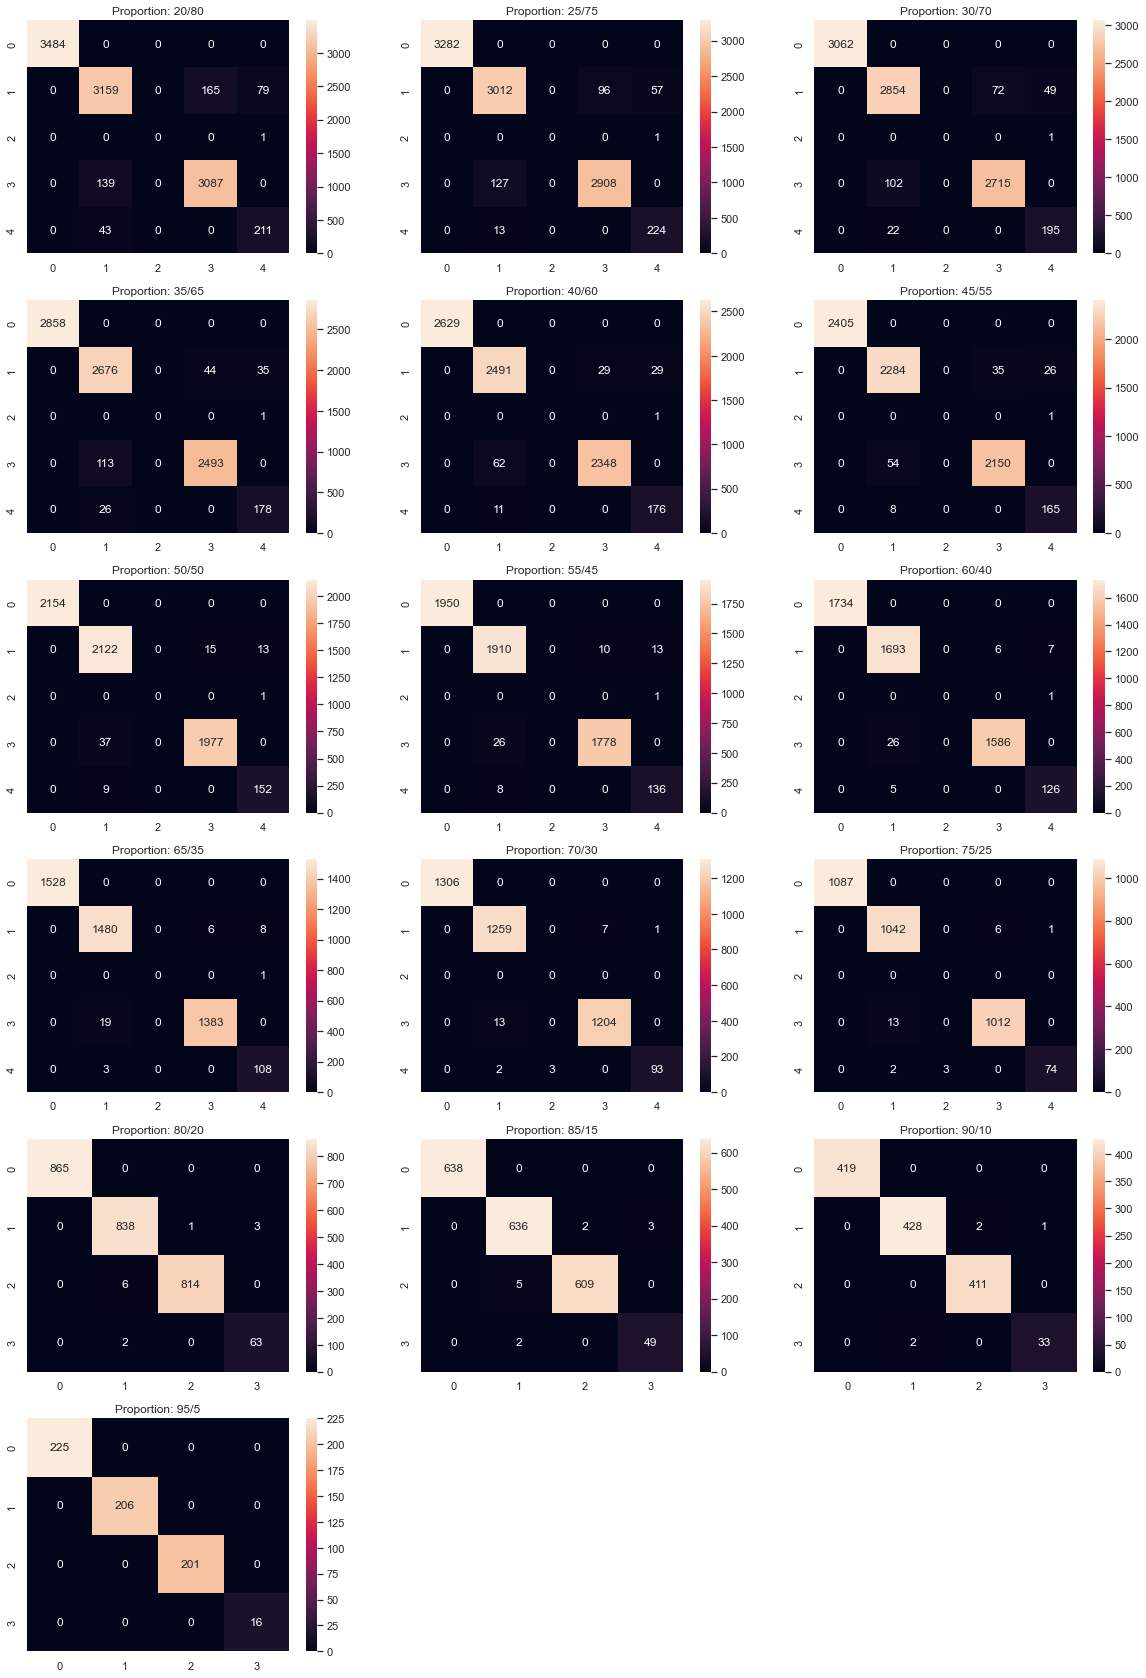

In [186]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

#config
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

plt.figure(figsize=(20,30 ))

for i in range(len(subset)):
   plt.subplot(6, 3, i+1) 

   #-------------------------predict
   for column in subset[i][2].columns:
      subset[i][2][column]=label_encoder.fit_transform(subset[i][2][column])
   clf = DecisionTreeClassifier(random_state=1234)
   model = clf.fit(subset[i][0], subset[i][1])
   y_pred = clf.predict(subset[i][2])

   #-----------------------report
   print(f"-------------------------------------Proportion: {20+i*5}/{100-20-i*5}-------------------------------------------")
   try:
      print(classification_report(subset[i][3], y_pred, target_names=y.unique()))
   except:
      print(classification_report(subset[i][3], y_pred, target_names=subset[i][3].unique()))

   matrix=confusion_matrix(subset[i][3], y_pred)
   sns.heatmap(matrix,annot=True, fmt="d")

   plt.title(f"Proportion: {20+i*5}/{100-20-i*5}")
# print("Accuracy:",metrics.accuracy_score(subset[0][3],y_pred))

In [192]:
from sklearn.metrics import accuracy_score
#-----------------------80% train
for column in subset[12][0].columns:
   subset[i][0][column]=label_encoder.fit_transform(subset[i][0][column])

#-----------------------------------------------Depth None
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(subset[12][0], subset[12][1])

# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=subset[12][0].columns,  
                                class_names=y.unique(),
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render(f"./depthAccuracy/decision_tree_graphivz_depth_None")
y_pred = clf.predict(subset[0][2])
print(f'--------------------------depth None------------------------------')
print(accuracy_score(subset[0][3], y_pred))
#------------------------------------------Depth 2-7
for i in range(2,8):
   clf = DecisionTreeClassifier(random_state=1234,max_depth=i)
   model = clf.fit(subset[12][0], subset[12][1])
   
   # DOT data
   dot_data = tree.export_graphviz(clf, out_file=None, 
                                   feature_names=subset[12][0].columns,  
                                   class_names=y.unique(),
                                   filled=True)
   
   # Draw graph
   graph = graphviz.Source(dot_data, format="png") 
   graph.render(f"./depthAccuracy/decision_tree_graphivz_depth_{i}")

   y_pred = clf.predict(subset[0][2])
   print(f'--------------------------depth {i}------------------------------')
   print(accuracy_score(subset[0][3], y_pred))

--------------------------depth None------------------------------
0.9988425925925926
--------------------------depth 2------------------------------
0.7648533950617284
--------------------------depth 3------------------------------
0.8119212962962963
--------------------------depth 4------------------------------
0.8586998456790124
--------------------------depth 5------------------------------
0.8776041666666666
--------------------------depth 6------------------------------
0.8894675925925926
--------------------------depth 7------------------------------
0.9236111111111112
